In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model


In [2]:
df = pd.read_csv("data_encodée.csv")

C:\Users\antoi\OneDrive\Documents\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (52,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df['Price_length'] = df['Price'] / df['Length']
df['Price_length'] = pd.to_numeric(df['Price_length'])

In [4]:
df['logprice'] = np.log(df['Price'])

In [5]:
oui = [2, 1]

conditions = [
    (df['Transsexual'] == 2),
    (df['Transsexual'] == 1),
    (df['Transsexual'] == 0),
]

values = [1, 1, 0]

df['Transgender'] = np.select(conditions, values)

In [6]:
df['Transgender'].value_counts()

0    18745
1     4346
Name: Transgender, dtype: int64

In [7]:
pd.options.display.max_columns = None
display(df)

,Unnamed: 0,Service_x,Length,Price,Agency,City,Incall,On_Time,Porn_Star,Languages,Service_y,Other_City_Serviced,Phone_Type,Smokes,Availability,Services_Delivered_As_Promised,Build,Ethnicity,Age,Eye_Color,Hair_Color,Hair_Type,Hair_Length,Piercings,Pussy,Photo_Accurate,Height,Transsexual,Breast_Size,Breast_Cup,Breast_Implants,Breast_Appearance,Tattoos,Massage,Sex,Blow_Job,Cum_In_Mouth,Touch_Pussy,Kiss,Two_Girl_Action,More_Than_One_Guy_At_A_Time,Multiple_Pops_Allowed,Squirt,Female_Condom,Massage_Quality,S_M,Lick_Pussy,Anal,Will_Bring_Second_Provider,Full_No_Rush_Session,Rimming,Allow_Film_Or_Picture,service_a,Transsexual_Functionality,Transsexual_Versatility,Transsexual_Cock_Size,Transsexual_Circumcised,Transsexual_Ejaculates,Phone 2,Agency_Name,service_b,service_c,Service_z,service_d,States,pays,Price_length,logprice,Transgender
0,0,3,30,200,NaN,53,NaN,NaN,NaN,30,None,247,4,0,2,1,2,61,1,2,0,4,4,3,3,3,3,1,2,2,2,5,1,0,2,3,0,0,2,0,0,0,0,0,4,0,0,3,0,0,9,0,NaN,4,9,6,3,3,NaN,74,NaN,NaN,NaN,NaN,56,65,6.666667,5.298317,1
1,1,4,60,150,NaN,992,NaN,NaN,NaN,56,None,247,2,0,1,1,1,108,2,0,0,4,4,3,0,3,0,1,2,3,2,5,1,1,2,3,0,0,2,0,0,0,0,0,4,0,0,3,0,0,0,0,NaN,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,66,39,2.500000,5.010635,1
2,2,3,60,300,NaN,101,NaN,NaN,NaN,3,Escort/Massage,247,3,0,2,1,2,18,2,2,3,4,6,5,2,3,3,1,2,2,2,6,0,7,2,3,0,3,1,0,0,0,0,0,1,0,2,3,0,3,0,0,Massage and Blow Job,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,55,65,5.000000,5.703782,1
3,3,3,30,300,NaN,533,NaN,NaN,NaN,3,Escort/Massage,247,4,0,0,1,6,18,1,2,0,4,4,3,3,3,3,1,2,2,2,6,1,7,2,0,0,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,Massage Hand Job,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,12,65,10.000000,5.703782,1
4,4,9,45,300,NaN,1024,NaN,NaN,NaN,3,Escort/Massage,247,4,1,1,0,7,110,5,3,4,1,4,0,0,2,2,1,9,6,1,2,2,7,0,1,0,1,1,0,0,0,0,0,3,3,1,0,0,1,0,0,NaN,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,12,65,6.666667,5.703782,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23086,3592,3,30,100,NaN,178,NaN,NaN,NaN,60,Escort/Massage/S&M,247,5,1,1,1,0,110,1,6,2,4,6,0,3,3,2,0,2,2,1,3,0,0,2,2,1,2,3,0,0,0,0,0,4,0,0,0,0,3,0,0,Escort Incall,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,93,65,3.333333,4.605170,0
23087,3594,0,45,125,NaN,938,NaN,NaN,NaN,60,Escort,247,3,1,1,1,1,110,3,6,3,4,6,0,3,3,2,0,2,1,1,6,1,0,2,3,0,2,2,0,0,3,0,0,4,0,2,0,0,3,0,0,NaN,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,55,65,2.777778,4.828314,0
23088,3595,5,60,200,NaN,203,NaN,NaN,NaN,60,Escort/Massage/S&M,247,3,0,1,1,0,110,1,6,4,4,6,5,2,3,2,0,2,1,1,9,0,1,2,2,1,1,1,0,0,2,0,0,4,3,1,1,0,2,0,0,NaN,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,79,65,3.333333,5.298317,0
23089,3596,3,60,200,NaN,434,NaN,NaN,NaN,60,Escort/Massage,247,3,1,1,1,6,110,2,6,0,3,6,3,3,3,3,0,1,2,1,9,0,4,2,3,3,3,2,0,0,3,0,0,1,0,0,0,0,3,0,0,NaN,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,40,65,3.333333,5.298317,0


Transformation de la variable age, et ajout de age carré

In [8]:
pd.to_numeric(df['Age'])

0        1
1        2
2        2
3        1
4        5
        ..
23086    1
23087    3
23088    1
23089    2
23090    4
Name: Age, Length: 23091, dtype: int64

In [9]:
df['Age2']=df['Age']*df['Age']

In [10]:
result_1 = sm.ols(formula= " logprice ~ Age ", data=df).fit()

NameError: name 'sm' is not defined

L'âge au carré n'apporte pas grand chose, en effet, comme la variable âge correspond à des intervalles, il n'y a pas de raison de la mettre au carré, on remarque juste que l'âge au carré est davantage significatif, signifiant simplement que une variable plus précise aurait sans doute eu un pouvoir prédictif meilleur. Finalement la variable âge dans une régression simple est négativement corrélée avec la logprice

### Régressions

1. Régression avec que le temps et dummy transgenre

In [12]:
import statsmodels.formula.api as sm
result_1 = sm.ols(formula= " logprice ~ C(Transgender) + Length", data=df).fit()

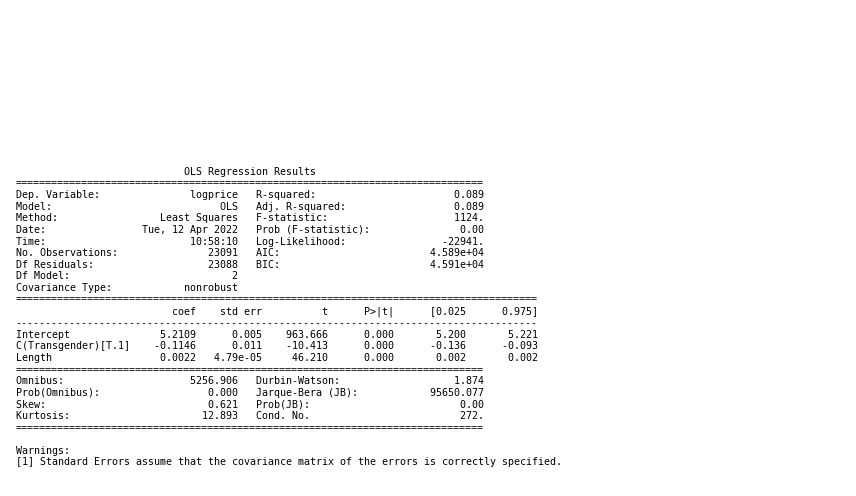

In [13]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_1.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_1.png')

2. Régression sur les services

In [14]:
result_1 = sm.ols(formula= " logprice ~ C(Service_x) + Length", data=df).fit()

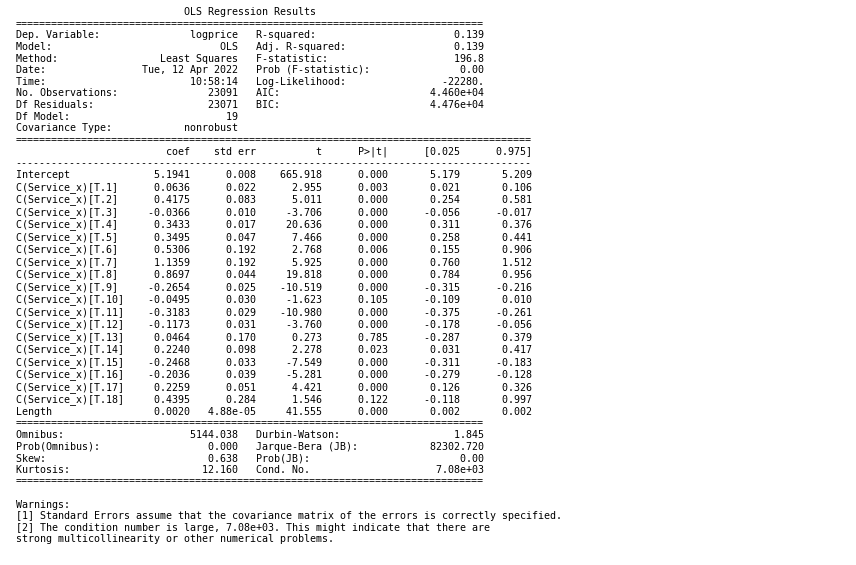

In [15]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_1.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_1.png')

In [16]:
err_series = result_1.params - result_1.conf_int()[0]


Intercept             0.015288
C(Service_x)[T.1]     0.042186
C(Service_x)[T.2]     0.163282
C(Service_x)[T.3]     0.019383
C(Service_x)[T.4]     0.032607
C(Service_x)[T.5]     0.091753
C(Service_x)[T.6]     0.375752
C(Service_x)[T.7]     0.375759
C(Service_x)[T.8]     0.086015
C(Service_x)[T.9]     0.049454
C(Service_x)[T.10]    0.059735
C(Service_x)[T.11]    0.056816
C(Service_x)[T.12]    0.061120
C(Service_x)[T.13]    0.333131
C(Service_x)[T.14]    0.192704
C(Service_x)[T.15]    0.064089
C(Service_x)[T.16]    0.075565
C(Service_x)[T.17]    0.100157
C(Service_x)[T.18]    0.557097
Length                0.000096
dtype: float64

In [17]:
coef_df = pd.DataFrame({'coef': result_1.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

Voici l'ordre des labels

array(['Escort ', 'Escort And Anal', 'Escort And Dinner Date',
       'Escort Incall', 'Escort Outcall', 'Escort Second Pop',
       'Escort With Another Guy', 'Escort With Couple',
       'Escort With another Girl', 'Massage ', 'Massage Body to Body',
       'Massage Hand Job', 'Massage Nude', 'Massage Sensual Domination',
       'Massage Tantra', 'Massage Topless', 'Massage and Blow Job',
       'S&M ', 'S&M With Another Girl'], dtype=object)


<ipython-input-18-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


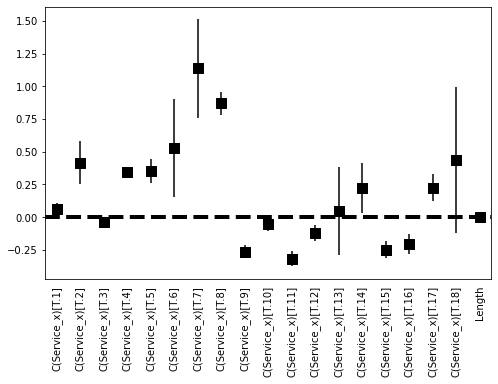

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

Au vu des résultats on regroupe les labels en 3 catégories: Massage, S et M et escort.

In [19]:

conditions = [
    (df['Service_x'] == 0),
    (df['Service_x'] == 1),
    (df['Service_x'] == 2),
    (df['Service_x'] == 3),
    (df['Service_x'] == 4),
    (df['Service_x'] == 5),
    (df['Service_x'] == 6),
    (df['Service_x'] == 7),
    (df['Service_x'] == 8),
     (df['Service_x'] == 9),
    (df['Service_x'] == 10),
    (df['Service_x'] == 11),
    (df['Service_x'] == 12),
    (df['Service_x'] == 13),
    (df['Service_x'] == 14),
    (df['Service_x'] == 15),
    (df['Service_x'] == 16),
    (df['Service_x'] == 17),
    (df['Service_x'] == 18),
]

values = [0, 0, 0, 0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2]

df['Service_x'] = np.select(conditions, values)

In [20]:
result_2 = sm.ols(formula= " logprice ~ C(Service_x) + Length+C(Transgender)", data=df).fit()

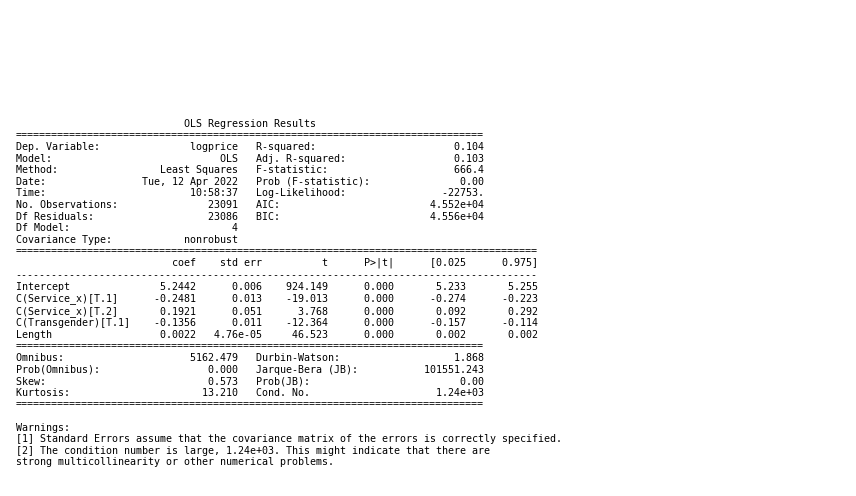

In [21]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_2.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_2.png')

In [22]:
err_series = result_2.params - result_2.conf_int()[0]
err_series
coef_df = pd.DataFrame({'coef': result_2.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })


<ipython-input-23-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


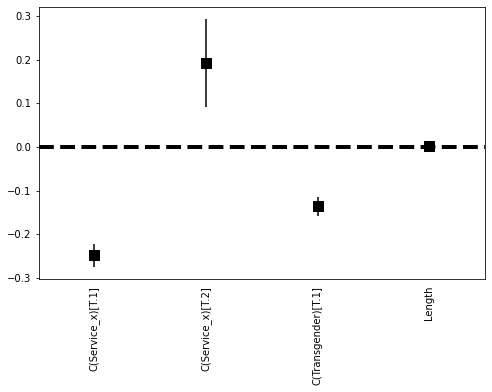

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

In [24]:
result_3 = sm.ols(formula= " logprice ~ C(Service_x) + Length+C(Transgender)", data=df).fit()

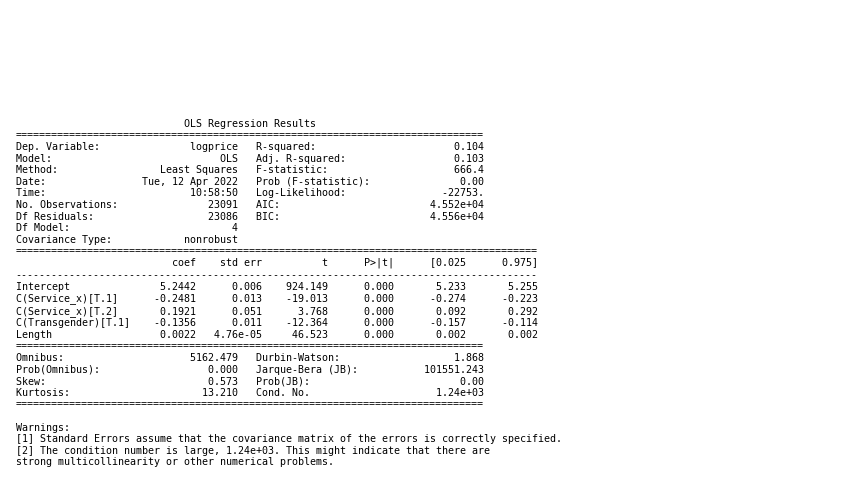

In [25]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_3.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result3.png')

3. Sur les caractéristiques physiques

Maintenant, on va faire une régression qui se focalise sur les caractéristiques physiques de la prostituée

In [26]:
result_4 = sm.ols(formula= " logprice ~ Length+C(Transgender)+ C(Breast_Size)+ C(Breast_Cup)+C(Breast_Implants)+C(Breast_Appearance)+C(Tattoos)", data=df).fit()

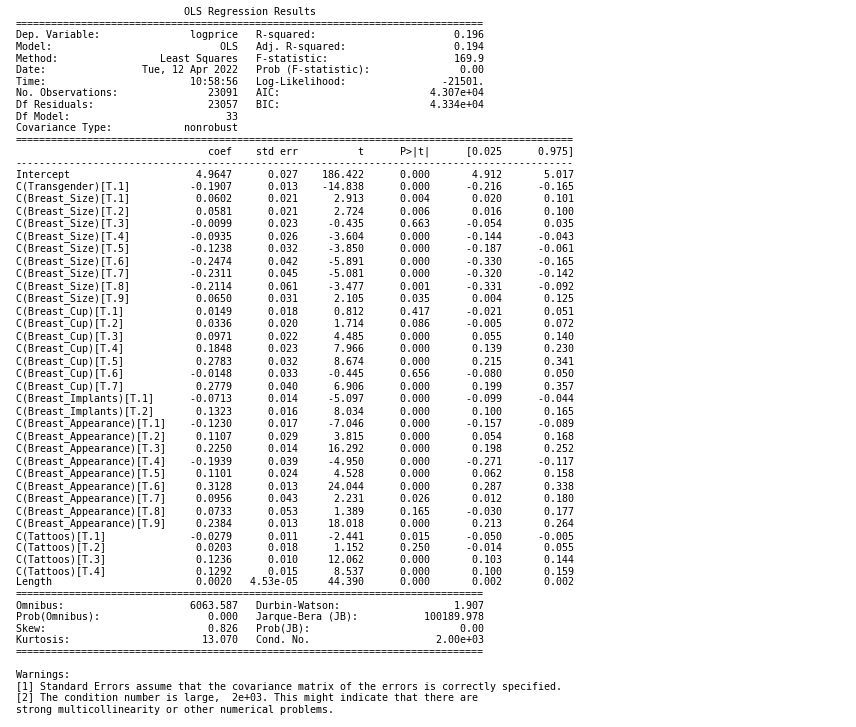

In [27]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_4.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result4.png')

In [30]:
err_series = result_4.params - result_4.conf_int()[0]
err_series
coef_df = pd.DataFrame({'coef': result_4.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })


<ipython-input-31-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


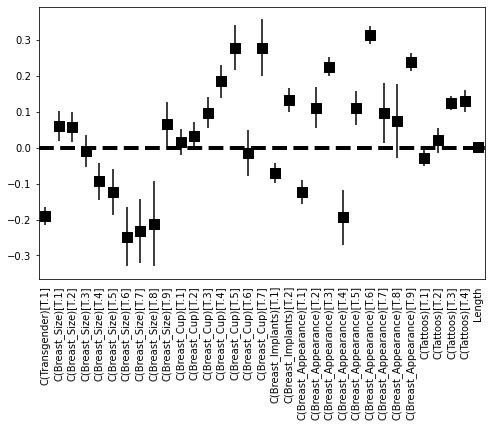

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

Plus on est fine+grosse poitrine, plus le pouvoir de négociayion est élevé

In [32]:

conditions = [
    (df['Breast_Appearance'] == 0),
    (df['Breast_Appearance'] == 1),
    (df['Breast_Appearance'] == 2),
    (df['Breast_Appearance'] == 3),
    (df['Breast_Appearance'] == 4),
    (df['Breast_Appearance'] == 5),
    (df['Breast_Appearance']== 6),
    (df['Breast_Appearance'] == 7),
    (df['Breast_Appearance'] == 8),
     (df['Breast_Appearance'] == 9),
]

values = [0, 0, 0, 1,0,0,1,0,0,1]

df['Breast_Appearance'] = np.select(conditions, values)

In [33]:

conditions = [
    (df['Breast_Cup'] == 0),
    (df['Breast_Cup'] == 1),
    (df['Breast_Cup'] == 2),
    (df['Breast_Cup'] == 3),
    (df['Breast_Cup'] == 4),
    (df['Breast_Cup'] == 5),
    (df['Breast_Cup'] == 6),
    (df['Breast_Cup'] == 7),

]

values = [1, 2, 3, 4,5,6,0,7]

df['Breast_Cup'] = np.select(conditions, values)
pd.to_numeric(df['Breast_Cup'])
     

0        3
1        4
2        3
3        3
4        0
        ..
23086    3
23087    2
23088    2
23089    3
23090    2
Name: Breast_Cup, Length: 23091, dtype: int32

In [34]:

conditions = [
    (df['Tattoos'] == 0),
    (df['Tattoos'] == 1),
    (df['Tattoos'] == 2),
    (df['Tattoos'] == 3),
    (df['Tattoos'] == 4),
]

values = [1, 1, 1, 0,1]

df['Tattoos'] = np.select(conditions, values)

In [35]:
pd.to_numeric(df['Breast_Size'])

0        2
1        2
2        2
3        2
4        9
        ..
23086    2
23087    2
23088    2
23089    1
23090    3
Name: Breast_Size, Length: 23091, dtype: int64

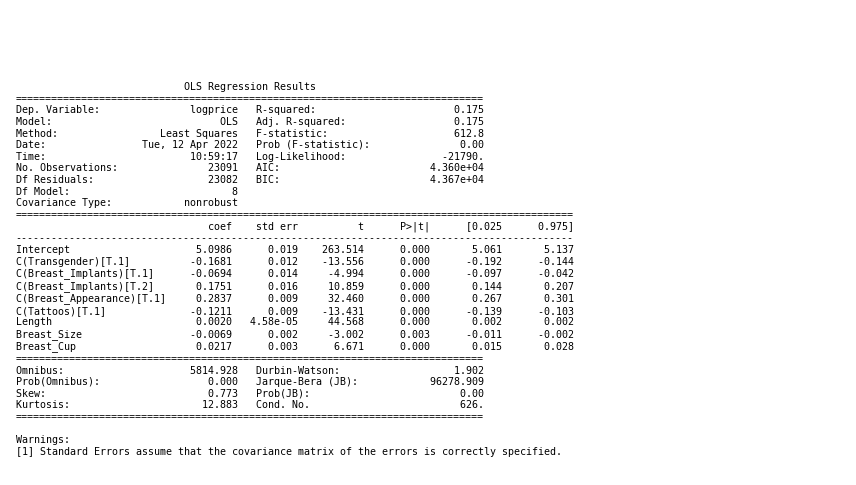

In [36]:
result_4 = sm.ols(formula= " logprice ~ Length+C(Transgender)+ Breast_Size+ Breast_Cup+C(Breast_Implants)+C(Breast_Appearance)+C(Tattoos)", data=df).fit()
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_4.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result4.png')

Ne pas avoir de tatouages a un effet positif sur le prix

4. Une régression sur les variables de services

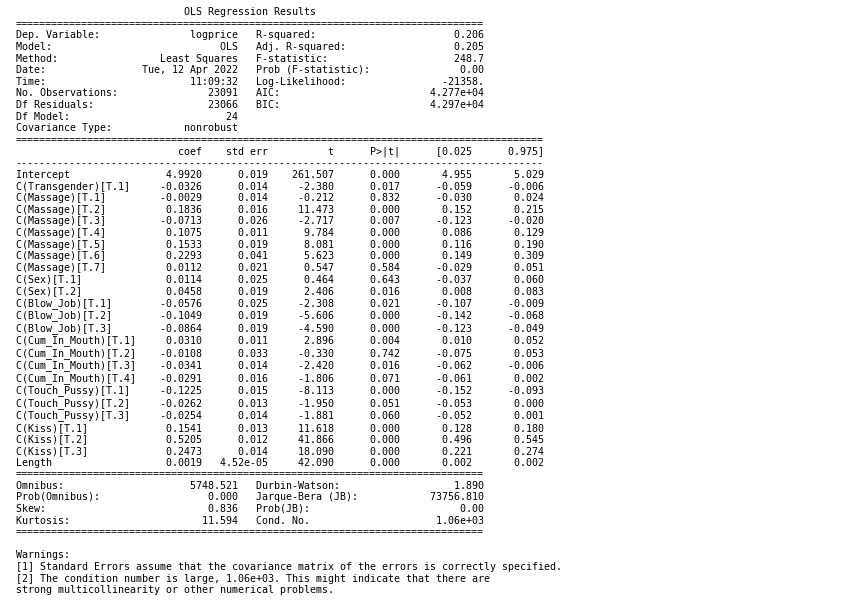

In [40]:
result_5 = sm.ols(formula= " logprice ~ Length+ C(Transgender)+ C(Massage)+ C(Sex)+ C(Blow_Job)+C(Cum_In_Mouth)+ C(Touch_Pussy)+C(Kiss)", data=df).fit()
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_5.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result5.png')

In [41]:
err_series = result_5.params - result_5.conf_int()[0]
err_series
coef_df = pd.DataFrame({'coef': result_5.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })


<ipython-input-42-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


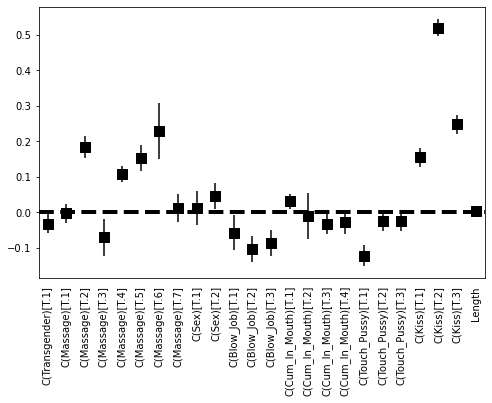

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

<ipython-input-43-21e1fe74d7a5>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


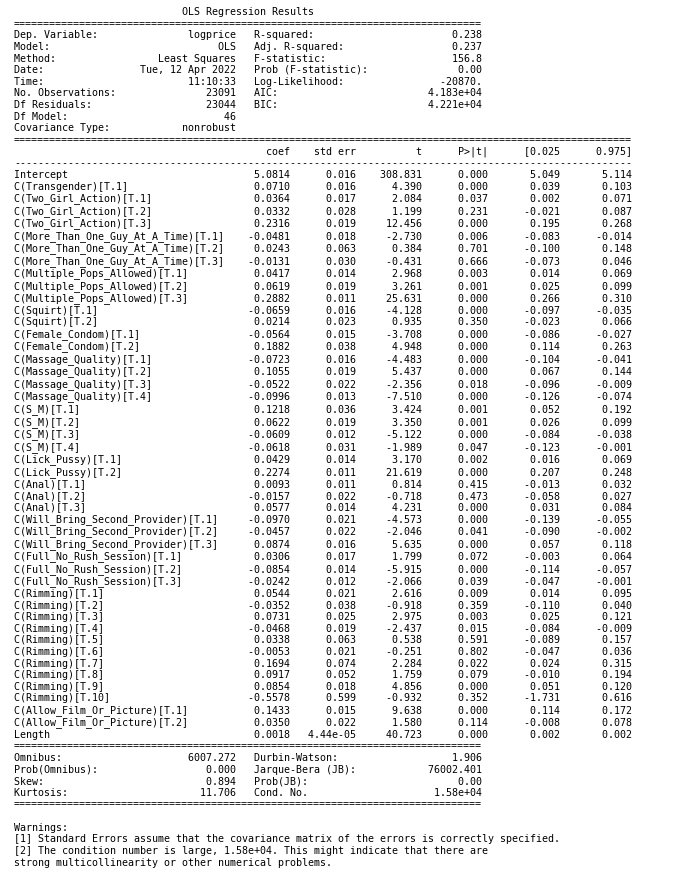

In [43]:
result_6 = sm.ols(formula= " logprice ~ Length+ C(Transgender)+C(Two_Girl_Action)+C(More_Than_One_Guy_At_A_Time)+C(Multiple_Pops_Allowed)+ C(Squirt)+C(Female_Condom)+C(Massage_Quality)+C(S_M)+C(Lick_Pussy)+ C(Anal)+C(Will_Bring_Second_Provider)+C(Full_No_Rush_Session)+C(Rimming)+C(Allow_Film_Or_Picture)", data=df).fit()
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_6.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result5.png')

In [44]:
err_series = result_6.params - result_6.conf_int()[0]
err_series
coef_df = pd.DataFrame({'coef': result_6.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

<ipython-input-45-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


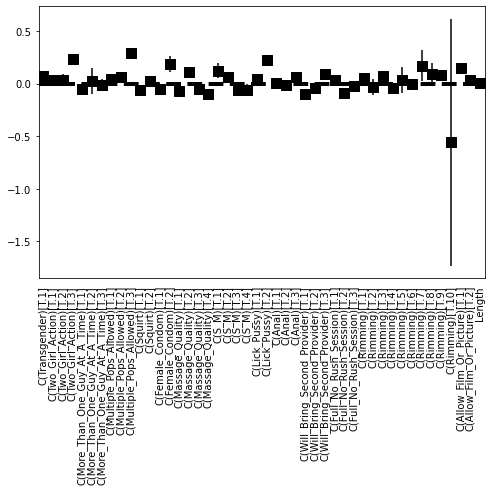

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

### Statistiques descriptives

In [69]:
df_1=df[['logprice', 'Length', 'Service_x', 'City', 'Languages', 'Ethnicity', 'Age', 'Transgender', 'Pussy', 'Breast_Size']]

corr = df_1.corr(method='spearman')

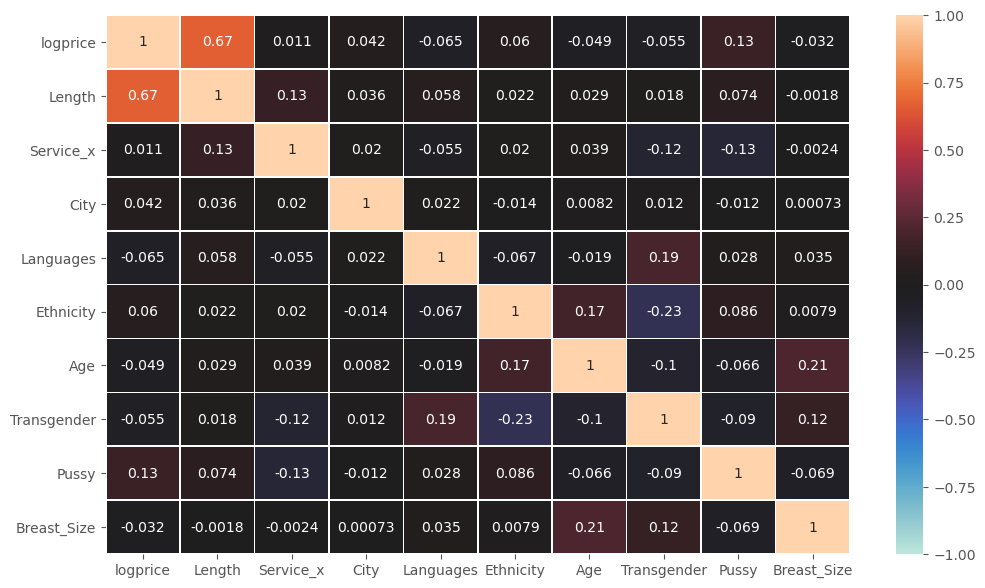

In [70]:
sns.heatmap(corr,   vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)
fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

In [115]:
df_1=df[['Price', 'Breast_Size', 'Breast_Cup','Breast_Implants','Breast_Appearance','Tattoos']]

corr = df_1.corr(method='spearman')

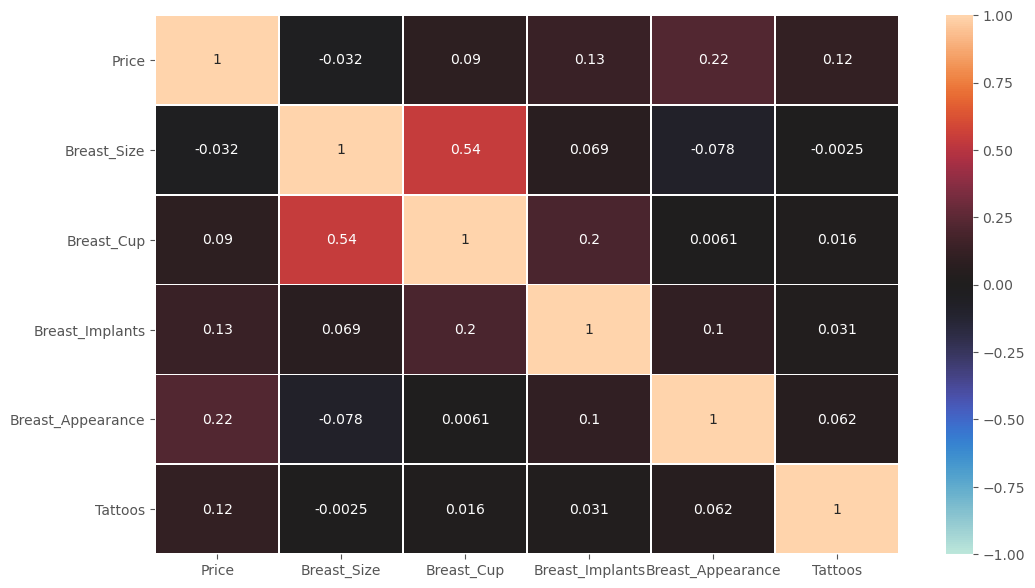

In [116]:
sns.heatmap(corr,   vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)
fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

In [118]:
df_1=df[['Price','Massage','Sex','Blow_Job','Cum_In_Mouth','Touch_Pussy','Kiss','Two_Girl_Action','More_Than_One_Guy_At_A_Time','Multiple_Pops_Allowed','Squirt','Female_Condom','Massage_Quality','S_M','Lick_Pussy', 'Anal','Will_Bring_Second_Provider','Full_No_Rush_Session','Rimming','Allow_Film_Or_Picture']]
corr = df_1.corr(method='spearman')

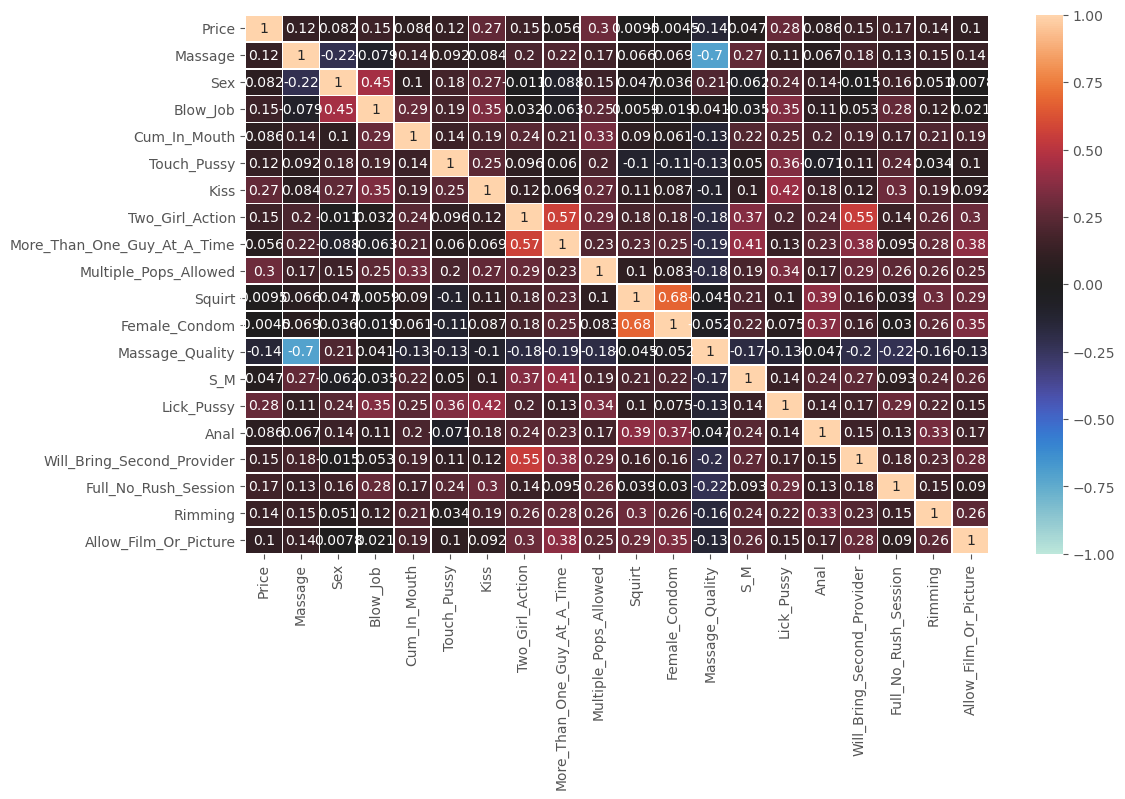

In [119]:
sns.heatmap(corr,   vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)
fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()